In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
import textwrap

from runners.vStirapRunner import ExperimentalRunner, Atom4lvl, Cavity, LaserCoupling, CavityCoupling

# Section 1 - Simple 4-level atom

Here are some simple tests demonstrating a simple 4-level atom:
	- Three ground levels: 'gM', 'g', 'gP' with magnetic states -1, 0, +1 respectively.
	- One excited level: 'x' with magnetic state 0.
	- The transition strength between all ground levels and the exicted level are equal.

### 1.1 Vacuum Rabi oscillations

With no spontaneous emission, and g > $\kappa$ we observe a damped oscillation on the cavity coupled transition.

In [2]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_0_98120.pyx.  Generated in 4.112 seconds.


In [3]:
psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

Running simulation with 501 timesteps...finished in 0.103 seconds


Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x109942cc0>,
 <matplotlib.figure.Figure at 0x11b0cd8d0>)

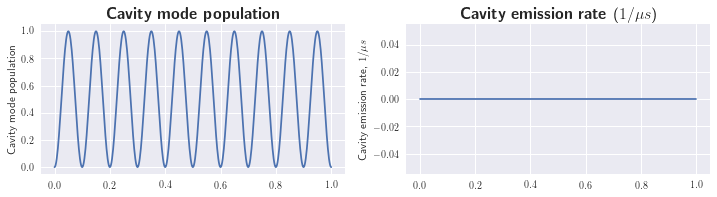

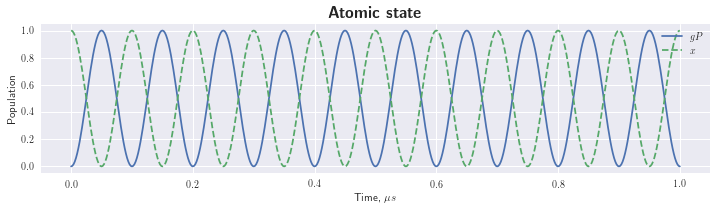

In [4]:
results.plot(['gP', 'x'])

Detuning the cavity from resonance results in smaller Rabi osciallations at a higher frequency.

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_98120.pyx, is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.079 seconds
Photon emission: 0.0
Spontaneous emission:

 0.0


(<matplotlib.figure.Figure at 0x119e4c358>,
 <matplotlib.figure.Figure at 0x11b4092b0>)

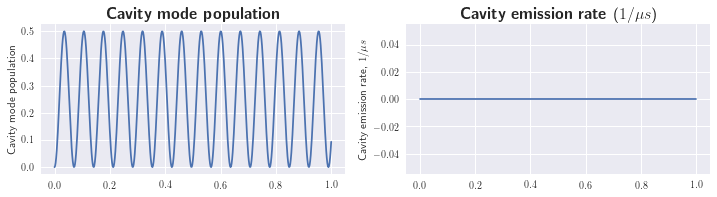

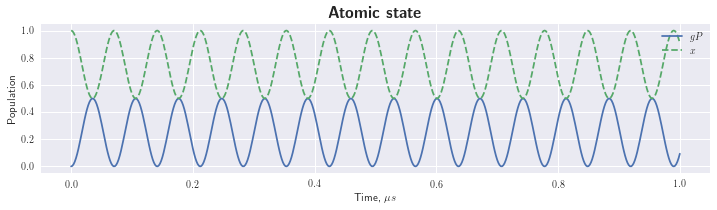

In [5]:
cavity_coupling.deltaC = 10 * 2*np.pi

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

results = runner.run(psi0, t_length, n_steps)

results.plot(['gP', 'x'])

The Rabi oscillations can be damped by both cavity decay ($\kappa$) and spontaneous emission ($\gamma$).

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_1_98120.pyx.  Generated in 3.653 seconds.
Running simulation with 501 timesteps...finished in 0.086 seconds
Photon emission: 0.487
Spontaneous emission: 0.49


(<matplotlib.figure.Figure at 0x11dcfbc18>,
 <matplotlib.figure.Figure at 0x11e189b70>)

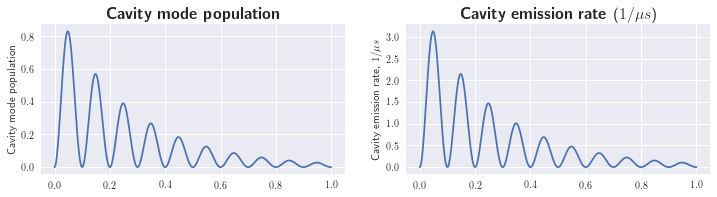

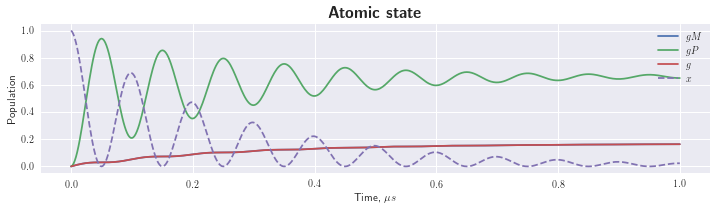

In [6]:
atom4lvl.gamma = 0.3 * 2*np.pi
cav.kappa = 0.3 * 2*np.pi
cavity_coupling.deltaC = 0 * 2*np.pi

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.2 Rabi oscillations

Of course we can drive Rabi oscillations with a laser too.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_2_98120.pyx.  Generated in 3.772 seconds.
Running simulation with 501 timesteps...finished in 0.11 seconds
Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x11ec83358>,
 <matplotlib.figure.Figure at 0x11b8a64e0>)

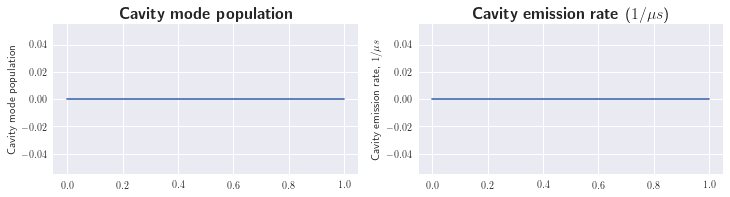

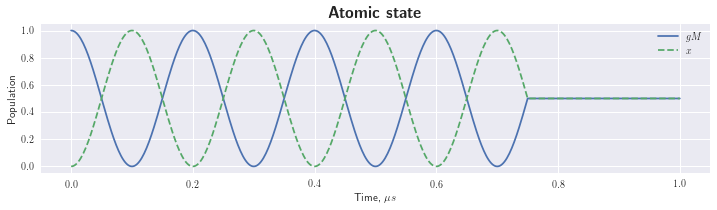

In [7]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)


# Our pulse will be on for 0.75us and then switch off.
# Note that couple_off_resonance=False means we only consider the 'gM' <-> 'x' transition coupled.
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(['gM', 'x'])

Now let's see what happens if we don't magically ignore other transitions the laser (which drives both $\sigma^{+}$ and $\sigma^{-}$ transitions) can couple.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_3_94690.pyx.  Generated in 3.919 seconds.
Running simulation with 501 timesteps...finished in 0.153 seconds
Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x1185e9518>,
 <matplotlib.figure.Figure at 0x118e18400>)

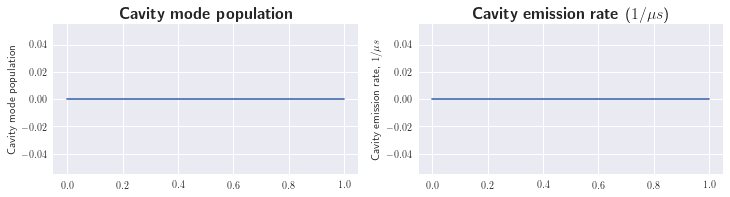

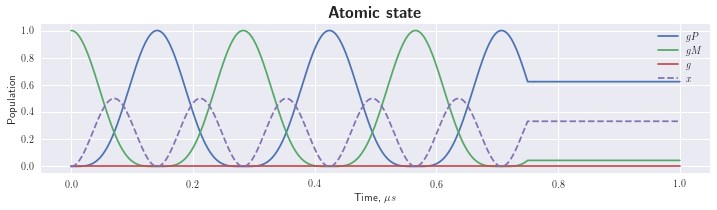

In [8]:
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True # <-- This is the change!
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

Now let's also couple $\pi$ transitions and, for fun, start with a random population distribution across the three ground levels.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_4_94690.pyx.  Generated in 4.241 seconds.
Running simulation with 501 timesteps...finished in 0.196 seconds


Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x118bc2c88>,
 <matplotlib.figure.Figure at 0x1191407f0>)

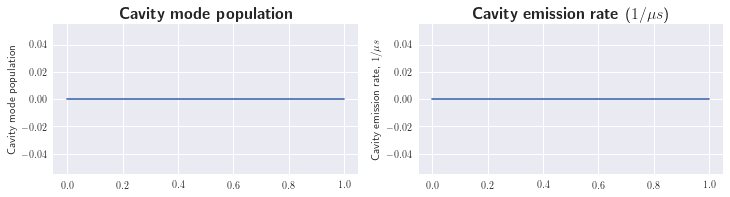

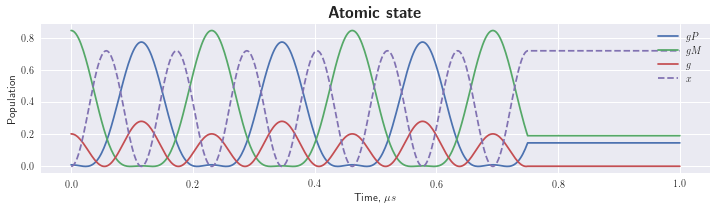

In [9]:
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,0,-1],  # <-- Let's couple pi transitions too!
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

v = np.random.randn(3)
v /= np.sqrt(np.linalg.norm(v))

psi0 = v[0]*runner.ket('gM',0) + v[1]*runner.ket('g',0) + v[2]*runner.ket('gP',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.3 v-Stirap

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_5_94690.pyx.  Generated in 4.04 seconds.
Running simulation with 501 timesteps...finished in 0.116 seconds
Photon emission: 0.997
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x1192659b0>,
 <matplotlib.figure.Figure at 0x11948bb38>)

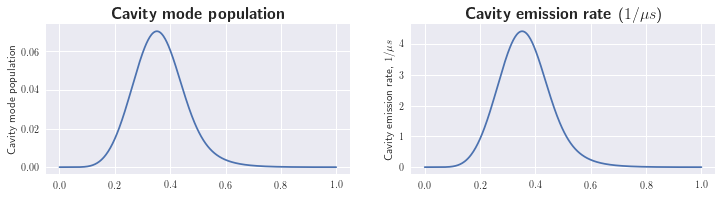

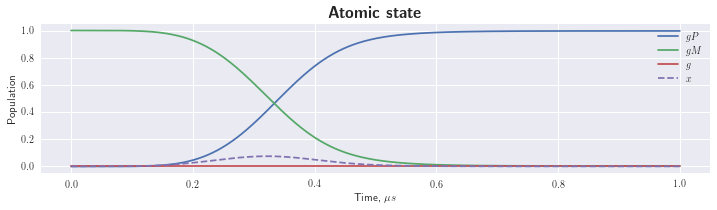

In [10]:
atom3lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 5. * 2.*np.pi)

length_pulse = 1
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [np.sin((np.pi/length_pulse)*t)**2,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.4 Spontaneous decay

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_4_98120.pyx, is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.065 seconds
Photon emission: 0.0
Spontaneous emission: 1.0


(<matplotlib.figure.Figure at 0x11b08c8d0>,
 <matplotlib.figure.Figure at 0x11b467390>)

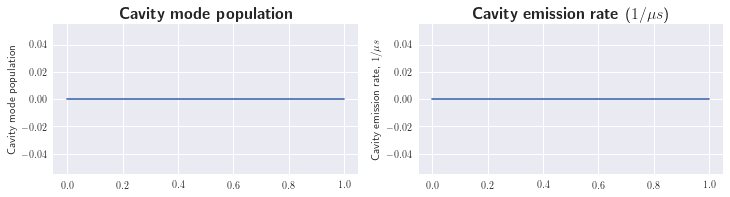

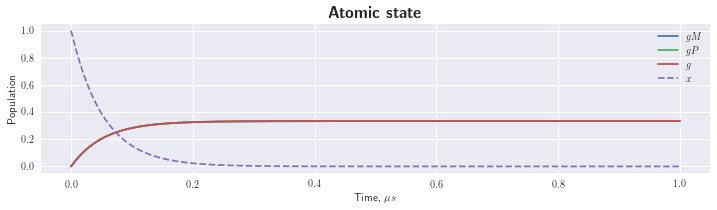

In [10]:
atom4lvl = Atom4lvl(gamma=3*np.pi)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 5. * 2.*np.pi)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.5 Customising the atom

Here we demonstrate how the atom object can be modified.

#####  1.5.1 Configured energy levels

As introduced above, the Atom4lvl has three ground states and one excited state, and so is already a fairly simple system.  However, if you want to further reduce the system a subset of the these levels can be configured by the 'configured_states' parameter.

It is also possible to directly modify the 'g_states' and 'x_states' dictionaries, however this is duplicated functionality with 'configured_states' and so the use of the later is recommended.

In [11]:
atom2lvl = Atom4lvl(gamma=0, configured_states=['gP','x'])
atom4lvl = Atom4lvl(gamma=0)

for atom, n_lev in zip([atom2lvl, atom4lvl],[2,4]):
    print('atom{}lvl'.format(n_lev))
    print('\t', atom.g_states, atom.x_states)
    print('\t', atom.transition_strengths)

atom2lvl
	 {'gP': 0} {'x': 1}
	 {'x': {'gP': 1}}
atom4lvl
	 {'gM': 0, 'g': 1, 'gP': 2} {'x': 3}
	 {'x': {'gM': 1, 'g': 1, 'gP': 1}}


In [14]:
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)


runner2lvl = ExperimentalRunner(atom=atom2lvl,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

runner4lvl = ExperimentalRunner(atom=atom4lvl,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_7_94690.pyx.  Generated in 3.922 seconds.
Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_94690.pyx, is suitable to run this experiment.


For 2-level system we have the following interaction Hamiltonians and results:


[[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
  Qobj data =
  [[ 0.  0.  0.  0.]
   [ 0.  0. -1.  0.]
   [ 0. -1.  0.  0.]
   [ 0.  0.  0.  0.]], 'g0_gPx * cos(omegaC_gPx*t)'],
 [Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
  Qobj data =
  [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.-1.j  0.+0.j]
   [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]],
  'g0_gPx * sin(omegaC_gPx*t)']]

Running simulation with 501 timesteps...finished in 0.079 seconds
Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x118844c88>,
 <matplotlib.figure.Figure at 0x119c301d0>)

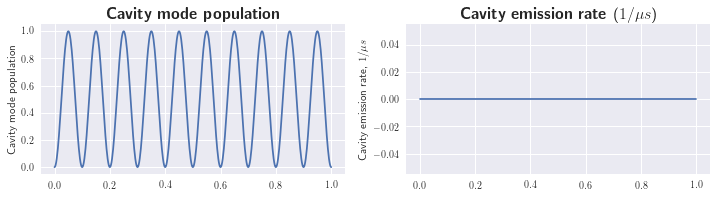

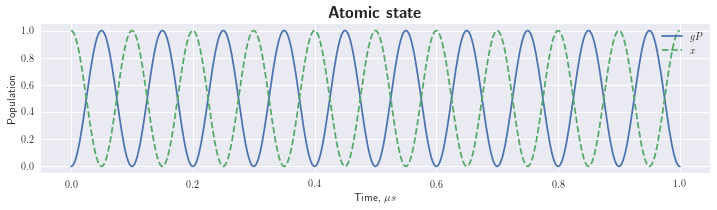

In [15]:
print('For 2-level system we have the following interaction Hamiltonians and results:')

display(runner2lvl.compiled_hamiltonian.hams)

psi0 = runner2lvl.ket('x',0)
t_length = 1
n_steps = 501

results = runner2lvl.run(psi0, t_length, n_steps)

results.plot()

For 4-level system we have the following interaction Hamiltonians and results:


[[Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0. -1.  0.]
   [ 0.  0.  0.  0.  0. -1.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.]], 'g0_gPx * cos(omegaC_gPx*t)'],
 [Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-1.j  0.+0.j]
   [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0

Running simulation with 501 timesteps...finished in 0.081 seconds
Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x119b96fd0>,
 <matplotlib.figure.Figure at 0x117fc8b70>)

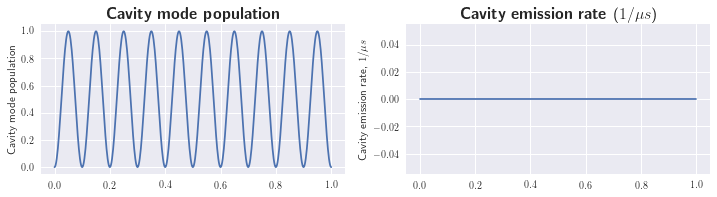

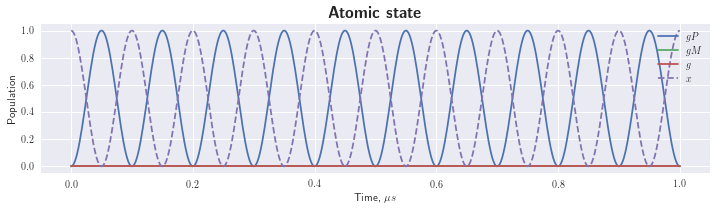

In [16]:
print('For 4-level system we have the following interaction Hamiltonians and results:')

display(runner4lvl.compiled_hamiltonian.hams)

psi0 = runner4lvl.ket('x',0)
t_length = 1
n_steps = 501

results = runner4lvl.run(psi0, t_length, n_steps)

results.plot()

#####  1.5.2 Configured transition strengths

The transtion strengths (proporional to the reduced dipole moment squared) determine the effective coupling strength on different transitions, and the relative rates of spontaneous emission on each channel.

In [12]:
atomA = Atom4lvl(gamma=0, transition_strengths={'x':{'gM':0,'g':0,'gP':0.5}})
atomB = Atom4lvl(gamma=0, transition_strengths={'x':{'gM':1,'g':1,'gP':1}})

cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)


runnerA = ExperimentalRunner(atom=atomA,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

runnerB = ExperimentalRunner(atom=atomB,
                                cavity=cav,
                                laser_couplings=[],
                                cavity_couplings=cavity_coupling,
                                verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_5_98120.pyx.  Generated in 3.857 seconds.
Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_98120.pyx, is suitable to run this experiment.


So we see that the Rabi frequency is halfed on the transition with half the coupling strength...

Running simulation with 501 timesteps...finished in 0.089 seconds
Photon emission: 0.0


Spontaneous emission: 0.0
Running simulation with 501 timesteps...finished in 0.111 seconds
Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x11b466a20>,
 <matplotlib.figure.Figure at 0x11e2af828>)

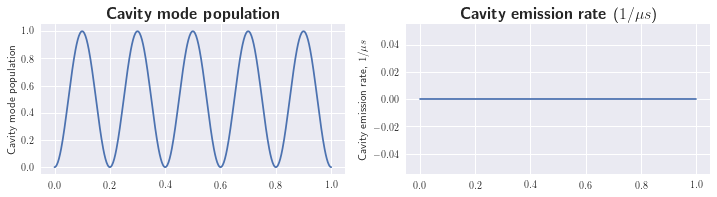

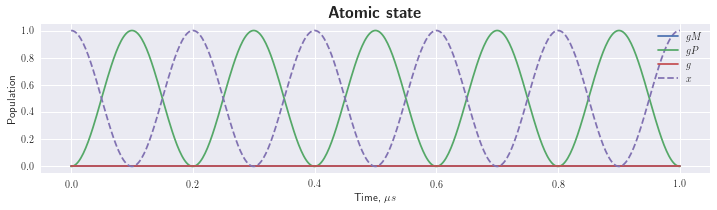

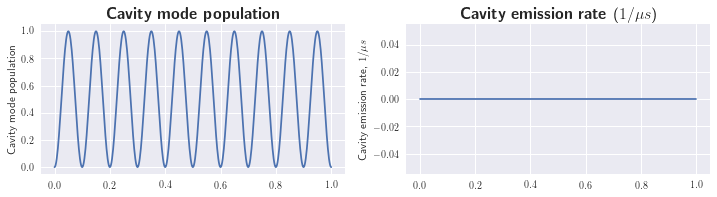

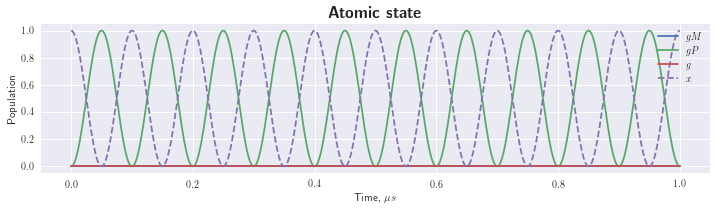

In [13]:
psi0 = ['x',0]
t_length = 1
n_steps = 501

runnerA.run(psi0, t_length, n_steps).plot()
runnerB.run(psi0, t_length, n_steps).plot()

Turning off the cavity coupling, and turing on atomic decay we also see how spontaneous decay is effected.  We note that the transition strength does (of course) effect the overall rate of spontaneous emission on that channel, however it is automatically assumed that all spontaneous emission must go somewhere in our system, i.e. the dissipative terms in our system -- namely spontaneous emission and cavity decay -- are couplings between states rather than losses from the system.  In the former case this is a coupling between atomic states
	|x-state, n_cav> -> |g_state, n_cav>,
and the later case is realised with
	|atom_state, n_cav> -> |atom_state, n_cav - 1>.
Practically this means the branching ratios of the allowed spontaneous emission channels are always adjusted such that they sum to one.

*Note of warning*

As the rate of decay of the atomic amplitude, $\gamma$, is defined in the atom, changing the values 'transition_strength' will not alter the total rate of spontanoues emission from the excited state - only the relative branching ratios of the decay.  In contrast, when the 'transition_strength' is changed, the response of the atom to an external field (be it a cavity coupling or a laser coupling), will also change (as we have just seen above).

In [14]:
for atom, lab in zip([atomA, atomB],['A','B']):
    print('For atom{}'.format(lab))
    atom.gamma = 0.1*2*np.pi
    print('\tTransition strengths: ', atom.transition_strengths)
    print('\tSpontaneous emission branching ratios: ', list(atom.get_spontaneous_emission_channels()))

For atomA
	Transition strengths:  {'x': {'gM': 0, 'g': 0, 'gP': 0.5}}
	Spontaneous emission branching ratios:  [('gM', 'x', 0.0), ('g', 'x', 0.0), ('gP', 'x', 1.0)]
For atomB
	Transition strengths:  {'x': {'gM': 1, 'g': 1, 'gP': 1}}
	Spontaneous emission branching ratios:  [('gM', 'x', 0.3333333333333333), ('g', 'x', 0.3333333333333333), ('gP', 'x', 0.3333333333333333)]


No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_6_98120.pyx.  Generated in 3.962 seconds.
No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_7_98120.pyx.  Generated in 3.737 seconds.
Running simulation with 501 timesteps...finished in 0.069 seconds
Running simulation with 501 timesteps...finished in 0.065 seconds
Photon emission: 0.0


Spontaneous emission: 0.715
Photon emission: 0.0
Spontaneous emission: 0.715


(<matplotlib.figure.Figure at 0x120392f28>,
 <matplotlib.figure.Figure at 0x1205161d0>)

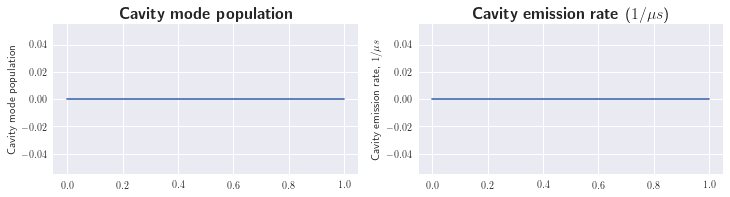

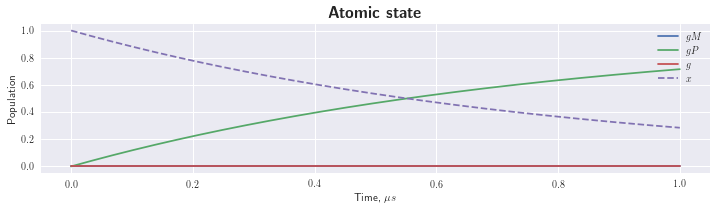

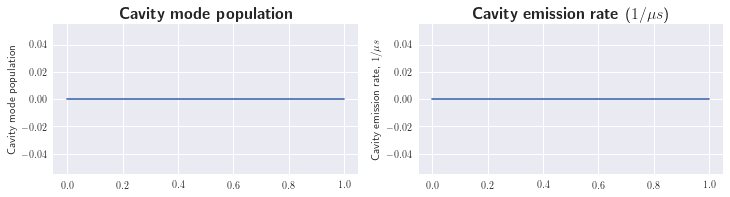

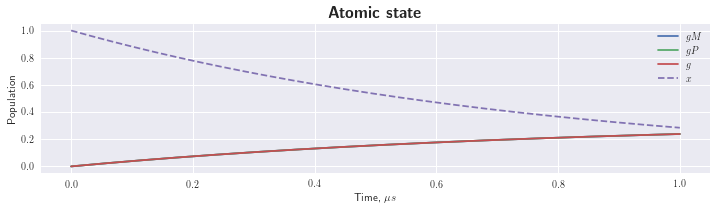

In [15]:
runnerA = ExperimentalRunner(atomA,cav,[],[],verbose=True)
runnerB = ExperimentalRunner(atomB,cav,[],[],verbose=True)

psi0 = ['x',0]
t_length = 1
n_steps = 501

resultsA = runnerA.run(psi0, t_length, n_steps)
resultsB = runnerB.run(psi0, t_length, n_steps)

resultsA.plot()
resultsB.plot()

We can check this is doing what we expect.  The excited state population is expected to decay exponentially at a rate $\Gamma=2\gamma$.  So for each atom let's calcualte the expected and the simulated population remaining in the excited state after the simulation.

In [16]:
for lab, atom, res in zip(['A','B'],[atomA,atomB],[resultsA, resultsB]):
    print(textwrap.dedent('''\
    For atom{0}, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)={1} ({2}).\
    '''.format(*([lab] + [np.round(x,3) for x in [np.exp(-2*atom.gamma*t_length), res.get_atomic_population('x',-1)[0]]]))))

For atomA, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)=0.285 (0.285).    
For atomB, we expect (simulate) the total population in x at the end of the simulation to be np.exp(-2*atom.gamma*t_length)=0.285 (0.285).    
